# 1. Import and Install Dependencies

In [ ]:
#!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [9]:
!pip install tensorflow

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import arabic_reshaper
from bidi.algorithm import get_display
from PIL import ImageFont, ImageDraw, Image

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [136]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [137]:
cap.release()
cv2.destroyAllWindows()

In [138]:
len(results.left_hand_landmarks.landmark)

21

In [139]:
results

mediapipe.python.solution_base.SolutionOutputs

In [140]:
draw_landmarks(frame, results)

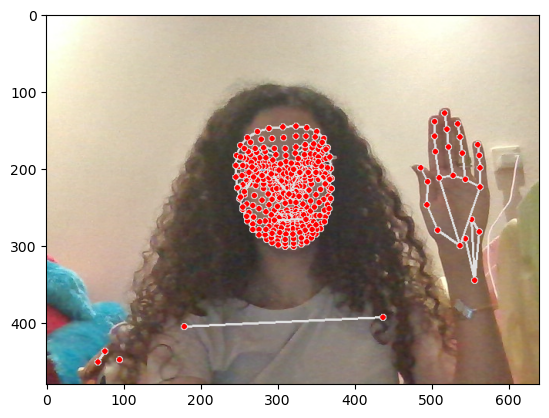

In [141]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [142]:
len(results.left_hand_landmarks.landmark)

21

In [143]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [144]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [145]:

face

array([ 0.49827349,  0.52965283, -0.02910601, ...,  0.55206692,
        0.39983293,  0.02118246])

In [146]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [147]:
result_test = extract_keypoints(results)

In [148]:
result_test

array([ 0.4935247 ,  0.48587197, -0.78946334, ...,  0.        ,
        0.        ,  0.        ])

In [149]:
468*3+33*4+21*3+21*3

1662

In [173]:
np.save('3', result_test)

In [174]:
np.load('3.npy')

array([ 0.4935247 ,  0.48587197, -0.78946334, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [175]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data3') 

# Actions that we try to detect
actions = np.array(['عليكم', 'شكرا', 'السلام'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 15

In [176]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [177]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass



# 5. Collect Keypoint Values for Training and Testing

In [178]:
fontpath = "arial.ttf" # <== https://www.freefontspro.com/14454/arial.ttf  
font = ImageFont.truetype(fontpath, 32)
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    t1 = "التقاط الصور ل"
                    reshaped_t1 = arabic_reshaper.reshape(t1)
                    bidi_t1 = get_display(reshaped_t1) 
                    t2 = "رقم الفيديو"
                    reshaped_t2 = arabic_reshaper.reshape(t2)
                    bidi_t2 = get_display(reshaped_t2) 
                    
                    img_pil = Image.fromarray(image)
                    draw = ImageDraw.Draw(img_pil)
                    reshaped_text = arabic_reshaper.reshape(action)
                    bidi_text = get_display(reshaped_text) 
                    draw.text((10,10),  '{} {} {} {}'.format(bidi_t2, bidi_text, bidi_t1, sequence), font = font, fill=(0, 0, 255))
                    image = np.array(img_pil)

        
                   # cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                    #           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                     
                    img_pil = Image.fromarray(image)
                    draw = ImageDraw.Draw(img_pil)
                    reshaped_text = arabic_reshaper.reshape(action)
                    bidi_text = get_display(reshaped_text) 
                    draw.text((10,10),  '{} {} {} {}'.format(bidi_t2, bidi_text, bidi_t1, sequence), font = font, fill=(0, 0, 255))
                    image = np.array(img_pil)

                    
                    #cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                     #          cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [179]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [180]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [181]:
label_map = {label:num for num, label in enumerate(actions)}

In [182]:
label_map

{'عليكم': 0, 'شكرا': 1, 'السلام': 2}

In [183]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [184]:
np.array(sequences).shape

(90, 15, 1662)

In [185]:
np.array(labels).shape

(90,)

In [186]:
X = np.array(sequences)

In [187]:
X.shape

(90, 15, 1662)

In [188]:
y = to_categorical(labels).astype(int)

In [189]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [191]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [193]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [195]:
log_dir = os.path.join('Logs3')
tb_callback = TensorBoard(log_dir=log_dir)

In [197]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(15,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [198]:
res = [.7, 0.2, 0.1]

In [199]:
actions[np.argmax(res)]

'عليكم'

In [200]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [201]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 4s 44ms/step - loss: 1.3106 - categorical_accuracy: 0.3412
Epoch 2/2000
3/3 [==============================] - 0s 44ms/step - loss: 1.1889 - categorical_accuracy: 0.2706
Epoch 3/2000
3/3 [==============================] - 0s 43ms/step - loss: 1.1533 - categorical_accuracy: 0.3765
Epoch 4/2000
3/3 [==============================] - 0s 44ms/step - loss: 1.9912 - categorical_accuracy: 0.1176
Epoch 5/2000
3/3 [==============================] - 0s 43ms/step - loss: 1.6211 - categorical_accuracy: 0.4706
Epoch 6/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.1285 - categorical_accuracy: 0.4118
Epoch 7/2000
3/3 [==============================] - 0s 43ms/step - loss: 1.1630 - categorical_accuracy: 0.3412
Epoch 8/2000
3/3 [==============================] - 0s 43ms/step - loss: 1.1657 - categorical_accuracy: 0.4118
Epoch 9/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.0836 - categorical_accuracy: 0.4000
E

3/3 [==============================] - 0s 41ms/step - loss: 2.9857e-06 - categorical_accuracy: 1.0000
Epoch 144/2000
3/3 [==============================] - 0s 41ms/step - loss: 2.9058e-06 - categorical_accuracy: 1.0000
Epoch 145/2000
3/3 [==============================] - 0s 38ms/step - loss: 2.8315e-06 - categorical_accuracy: 1.0000
Epoch 146/2000
3/3 [==============================] - 0s 50ms/step - loss: 2.7698e-06 - categorical_accuracy: 1.0000
Epoch 147/2000
3/3 [==============================] - 0s 52ms/step - loss: 2.7011e-06 - categorical_accuracy: 1.0000
Epoch 148/2000
3/3 [==============================] - 0s 51ms/step - loss: 2.6253e-06 - categorical_accuracy: 1.0000
Epoch 149/2000
3/3 [==============================] - 0s 49ms/step - loss: 2.5762e-06 - categorical_accuracy: 1.0000
Epoch 150/2000
3/3 [==============================] - 0s 53ms/step - loss: 2.5019e-06 - categorical_accuracy: 1.0000
Epoch 151/2000
3/3 [==============================] - 0s 52ms/step - loss: 2.45

3/3 [==============================] - 0s 39ms/step - loss: 2.6927e-07 - categorical_accuracy: 1.0000
Epoch 284/2000
3/3 [==============================] - 0s 40ms/step - loss: 2.6366e-07 - categorical_accuracy: 1.0000
Epoch 285/2000
3/3 [==============================] - 0s 40ms/step - loss: 2.6086e-07 - categorical_accuracy: 1.0000
Epoch 286/2000
3/3 [==============================] - 0s 37ms/step - loss: 2.5384e-07 - categorical_accuracy: 1.0000
Epoch 287/2000
3/3 [==============================] - 0s 39ms/step - loss: 2.4823e-07 - categorical_accuracy: 1.0000
Epoch 288/2000
3/3 [==============================] - 0s 39ms/step - loss: 2.4543e-07 - categorical_accuracy: 1.0000
Epoch 289/2000
3/3 [==============================] - 0s 41ms/step - loss: 2.3702e-07 - categorical_accuracy: 1.0000
Epoch 290/2000
3/3 [==============================] - 0s 40ms/step - loss: 2.3141e-07 - categorical_accuracy: 1.0000
Epoch 291/2000
3/3 [==============================] - 0s 39ms/step - loss: 2.28

3/3 [==============================] - 0s 42ms/step - loss: 5.0489e-08 - categorical_accuracy: 1.0000
Epoch 424/2000
3/3 [==============================] - 0s 42ms/step - loss: 5.1891e-08 - categorical_accuracy: 1.0000
Epoch 425/2000
3/3 [==============================] - 0s 42ms/step - loss: 5.1891e-08 - categorical_accuracy: 1.0000
Epoch 426/2000
3/3 [==============================] - 0s 43ms/step - loss: 5.1891e-08 - categorical_accuracy: 1.0000
Epoch 427/2000
3/3 [==============================] - 0s 45ms/step - loss: 5.0489e-08 - categorical_accuracy: 1.0000
Epoch 428/2000
3/3 [==============================] - 0s 42ms/step - loss: 4.9086e-08 - categorical_accuracy: 1.0000
Epoch 429/2000
3/3 [==============================] - 0s 43ms/step - loss: 4.9086e-08 - categorical_accuracy: 1.0000
Epoch 430/2000
3/3 [==============================] - 0s 41ms/step - loss: 5.0489e-08 - categorical_accuracy: 1.0000
Epoch 431/2000
3/3 [==============================] - 0s 43ms/step - loss: 4.90

3/3 [==============================] - 0s 47ms/step - loss: 1.8232e-08 - categorical_accuracy: 1.0000
Epoch 564/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.8232e-08 - categorical_accuracy: 1.0000
Epoch 565/2000
3/3 [==============================] - 0s 46ms/step - loss: 1.8232e-08 - categorical_accuracy: 1.0000
Epoch 566/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.6830e-08 - categorical_accuracy: 1.0000
Epoch 567/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.6830e-08 - categorical_accuracy: 1.0000
Epoch 568/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.6830e-08 - categorical_accuracy: 1.0000
Epoch 569/2000
3/3 [==============================] - 0s 48ms/step - loss: 1.6830e-08 - categorical_accuracy: 1.0000
Epoch 570/2000
3/3 [==============================] - 0s 44ms/step - loss: 1.6830e-08 - categorical_accuracy: 1.0000
Epoch 571/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.82

3/3 [==============================] - 0s 53ms/step - loss: 8.4148e-09 - categorical_accuracy: 1.0000
Epoch 704/2000
3/3 [==============================] - 0s 53ms/step - loss: 8.4148e-09 - categorical_accuracy: 1.0000
Epoch 705/2000
3/3 [==============================] - 0s 53ms/step - loss: 9.8172e-09 - categorical_accuracy: 1.0000
Epoch 706/2000
3/3 [==============================] - 0s 52ms/step - loss: 8.4148e-09 - categorical_accuracy: 1.0000
Epoch 707/2000
3/3 [==============================] - 0s 51ms/step - loss: 8.4148e-09 - categorical_accuracy: 1.0000
Epoch 708/2000
3/3 [==============================] - 0s 54ms/step - loss: 8.4148e-09 - categorical_accuracy: 1.0000
Epoch 709/2000
3/3 [==============================] - 0s 50ms/step - loss: 8.4148e-09 - categorical_accuracy: 1.0000
Epoch 710/2000
3/3 [==============================] - 0s 50ms/step - loss: 8.4148e-09 - categorical_accuracy: 1.0000
Epoch 711/2000
3/3 [==============================] - 0s 55ms/step - loss: 8.41

3/3 [==============================] - 0s 54ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 844/2000
3/3 [==============================] - 0s 54ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 845/2000
3/3 [==============================] - 0s 53ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 846/2000
3/3 [==============================] - 0s 53ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 847/2000
3/3 [==============================] - 0s 54ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 848/2000
3/3 [==============================] - 0s 52ms/step - loss: 4.2074e-09 - categorical_accuracy: 1.0000
Epoch 849/2000
3/3 [==============================] - 0s 50ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 850/2000
3/3 [==============================] - 0s 52ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 851/2000
3/3 [==============================] - 0s 53ms/step - loss: 2.80

3/3 [==============================] - 0s 51ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 984/2000
3/3 [==============================] - 0s 51ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 985/2000
3/3 [==============================] - 0s 50ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 986/2000
3/3 [==============================] - 0s 49ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 987/2000
3/3 [==============================] - 0s 50ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 988/2000
3/3 [==============================] - 0s 50ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 989/2000
3/3 [==============================] - 0s 49ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 990/2000
3/3 [==============================] - 0s 50ms/step - loss: 2.8049e-09 - categorical_accuracy: 1.0000
Epoch 991/2000
3/3 [==============================] - 0s 51ms/step - loss: 2.80

3/3 [==============================] - 0s 54ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 1122/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 1123/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 1124/2000
3/3 [==============================] - 0s 52ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 1125/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 1126/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 1127/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 1128/2000
3/3 [==============================] - 0s 52ms/step - loss: 1.4025e-09 - categorical_accuracy: 1.0000
Epoch 1129/2000
3/3 [==============================] - 0s 52ms/step - lo

3/3 [==============================] - 0s 49ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1260/2000
3/3 [==============================] - 0s 48ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1261/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1262/2000
3/3 [==============================] - 0s 51ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1263/2000
3/3 [==============================] - 0s 49ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1264/2000
3/3 [==============================] - 0s 48ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1265/2000
3/3 [==============================] - 0s 48ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1266/2000
3/3 [==============================] - 0s 51ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1267/2000
3/3 [==============================] - 0s 49ms/step - lo

3/3 [==============================] - 0s 49ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1398/2000
3/3 [==============================] - 0s 49ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1399/2000
3/3 [==============================] - 0s 48ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1400/2000
3/3 [==============================] - 0s 49ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1401/2000
3/3 [==============================] - 0s 49ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1402/2000
3/3 [==============================] - 0s 48ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1403/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1404/2000
3/3 [==============================] - 0s 48ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1405/2000
3/3 [==============================] - 0s 47ms/step - lo

3/3 [==============================] - 0s 57ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1536/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1537/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1538/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1539/2000
3/3 [==============================] - 0s 52ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1540/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1541/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1542/2000
3/3 [==============================] - 0s 52ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1543/2000
3/3 [==============================] - 0s 53ms/step - lo

3/3 [==============================] - 0s 53ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1674/2000
3/3 [==============================] - 0s 52ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1675/2000
3/3 [==============================] - 0s 52ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1676/2000
3/3 [==============================] - 0s 52ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1677/2000
3/3 [==============================] - 0s 51ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1678/2000
3/3 [==============================] - 0s 52ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1679/2000
3/3 [==============================] - 0s 51ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1680/2000
3/3 [==============================] - 0s 52ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1681/2000
3/3 [==============================] - 0s 51ms/step - lo

3/3 [==============================] - 0s 52ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1812/2000
3/3 [==============================] - 0s 51ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1813/2000
3/3 [==============================] - 0s 51ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1814/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1815/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1816/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1817/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1818/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1819/2000
3/3 [==============================] - 0s 55ms/step - lo

3/3 [==============================] - 0s 49ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1950/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1951/2000
3/3 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1952/2000
3/3 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1953/2000
3/3 [==============================] - 0s 48ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1954/2000
3/3 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1955/2000
3/3 [==============================] - 0s 48ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1956/2000
3/3 [==============================] - 0s 49ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000
Epoch 1957/2000
3/3 [==============================] - 0s 49ms/step - lo

In [202]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 15, 64)            442112    
                                                                 
 lstm_7 (LSTM)               (None, 15, 128)           98816     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-tr

# 8. Make Predictions

In [203]:
res = model.predict(X_test)
res

1/1 [==============================] - 0s 360ms/step


array([[8.1210365e-11, 1.5420706e-12, 1.0000000e+00],
       [9.9809508e-11, 6.0666756e-11, 1.0000000e+00],
       [9.9999988e-01, 2.4095028e-09, 8.8483311e-08],
       [4.2178270e-14, 1.0000000e+00, 1.4510069e-14],
       [1.0000000e+00, 5.0642554e-16, 2.4866641e-15]], dtype=float32)

In [204]:
actions[np.argmax(res[4])]

'عليكم'

In [205]:
actions[np.argmax(y_test[4])]

'عليكم'

# 9. Save Weights

In [206]:
model.save('action3.h5')

In [ ]:
#del model

In [207]:
from tensorflow.keras.models import load_model
model=load_model('action3.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [208]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [209]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 363ms/step


In [210]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [211]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 2]],

       [[4, 0],
        [0, 1]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [212]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [1]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
fontpath = "arial.ttf" # <== https://www.freefontspro.com/14454/arial.ttf  
def prob_viz(res, actions, input_frame, colors, fontpath):
    output_frame = input_frame.copy()
    
    for num, prob in enumerate(res):
        font = ImageFont.truetype(fontpath, 32)
        img_pil = Image.fromarray(output_frame)
        draw = ImageDraw.Draw(img_pil)
        reshaped_text = arabic_reshaper.reshape(actions[num])
        bidi_text = get_display(reshaped_text)
          #draw.rectangle((0,0, 640, 40),fill = (245, 117, 16))
        draw.rectangle((0, 60+num*40, (int(prob*100)), 90+num*40), fill = (colors[num]))
        draw.text((1, 60+num*35),  bidi_text, font = font, fill = (255,255,255))
       # cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
       # cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        output_frame = np.array(img_pil)
    return output_frame


       
        
       
             
        
     

In [2]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors, fontpath))

NameError: name 'plt' is not defined

In [227]:
sequence.reverse()

In [ ]:
len(sequence)

In [ ]:
sequence.append('def')

In [ ]:
sequence.reverse()

In [ ]:
sequence[-30:]

In [464]:
# 1. New detection variables
sequence = []
sentence = []
ar_sentence = []
threshold = 0.8
fontpath = "arial.ttf" # <== https://www.freefontspro.com/14454/arial.ttf  
font = ImageFont.truetype(fontpath, 32)

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]
                ar_sentence = ar_sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors, fontpath)
        img_pil = Image.fromarray(image)
        draw = ImageDraw.Draw(img_pil)
        for sen in sentence:
            reshaped_text = arabic_reshaper.reshape(sen)
            bidi_text = get_display(reshaped_text)
            ar_sentence.append(bidi_text)

       # draw.rectangle((0,0, 640, 40),fill = (245, 117, 16))
        #draw.text((3,0),  ' '.join(ar_sentence), font = font)
        image = np.array(img_pil)
        
        #cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
       # cv2.putText(image, ' '.join(sentence), (3,30), 
        #               cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()



<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 23ms/step
شكرا
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
شكرا
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
شكرا
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
شكرا
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
شكرا
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
شكرا
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
شكرا
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
شكرا
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
شكرا
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 22ms/step
عليكم
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
عليكم
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
عليكم
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
عليكم
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
عليكم
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
عليكم
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
عليكم
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
عليكم
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
عليكم
<class 'mediapipe.pyth

1/1 [==============================] - 0s 20ms/step
عليكم
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
عليكم
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
عليكم
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
عليكم
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
عليكم
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
عليكم
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
عليكم
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
عليكم
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
عليكم
<class 'mediapipe.pyth

1/1 [==============================] - 0s 21ms/step
شكرا
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
شكرا
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
شكرا
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
شكرا
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
شكرا
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
شكرا
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
عليكم
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
عليكم
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
عليكم
<class 'mediapipe.python.sol

1/1 [==============================] - 0s 22ms/step
عليكم
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
شكرا
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
شكرا
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
شكرا
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
شكرا
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
عليكم
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
شكرا
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
شكرا
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
شكرا
<class 'mediapipe.python.solu

1/1 [==============================] - 0s 23ms/step
عليكم
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
عليكم
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
عليكم
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
عليكم
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
عليكم
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
عليكم
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
شكرا
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
شكرا
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
شكرا
<class 'mediapipe.python.

In [447]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8
fontpath = "arial.ttf" # <== https://www.freefontspro.com/14454/arial.ttf  
font = ImageFont.truetype(fontpath, 32)

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            

        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 1:                        
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                        if str(actions[np.argmax(res)]) == 'hello':   
                            fontpath = "arial.ttf" # <== https://www.freefontspro.com/14454/arial.ttf  
                            font = ImageFont.truetype(fontpath, 32)
                            img_pil = Image.fromarray(image)
                            draw = ImageDraw.Draw(img_pil)
                            reshaped_text = arabic_reshaper.reshape("السلام")
                            bidi_text = get_display(reshaped_text) 
                            draw.text((50, 80),  bidi_text, font = font)
                            image = np.array(img_pil)
                        if str(actions[np.argmax(res)]) == 'thanks':
                            img_pil = Image.fromarray(image)
                            draw = ImageDraw.Draw(img_pil)
                            reshaped_text = arabic_reshaper.reshape("شكرا")
                            bidi_text = get_display(reshaped_text) 
                            draw.text((50, 80),  bidi_text, font = font)
                            image = np.array(img_pil)
                        
                        if str(actions[np.argmax(res)]) == 'iloveyou':
                            img_pil = Image.fromarray(image)
                            draw = ImageDraw.Draw(img_pil)
                            reshaped_text = arabic_reshaper.reshape("عليكم")
                            bidi_text = get_display(reshaped_text) 
                            draw.text((50, 80),  bidi_text, font = font)
                            image = np.array(img_pil)
                else:
                    sentence.append(actions[np.argmax(res)])
                    
                    if str(actions[np.argmax(res)]) == 'hello':   
                        fontpath = "arial.ttf" # <== https://www.freefontspro.com/14454/arial.ttf  
                        font = ImageFont.truetype(fontpath, 32)
                        img_pil = Image.fromarray(image)
                        draw = ImageDraw.Draw(img_pil)
                        reshaped_text = arabic_reshaper.reshape("السلام")
                        bidi_text = get_display(reshaped_text) 
                        draw.text((50, 80),  bidi_text, font = font)
                        image = np.array(img_pil)
                    if str(actions[np.argmax(res)]) == 'thanks':
                        img_pil = Image.fromarray(image)
                        draw = ImageDraw.Draw(img_pil)
                        reshaped_text = arabic_reshaper.reshape("شكرا")
                        bidi_text = get_display(reshaped_text) 
                        draw.text((50, 80),  bidi_text, font = font)
                        image = np.array(img_pil)

                    if str(actions[np.argmax(res)]) == 'iloveyou':
                        img_pil = Image.fromarray(image)
                        draw = ImageDraw.Draw(img_pil)
                        reshaped_text = arabic_reshaper.reshape("عليكم")
                        bidi_text = get_display(reshaped_text) 
                        draw.text((50, 80),  bidi_text, font = font)
                        image = np.array(img_pil)

            if len(sentence) > 3: 
                sentence = sentence[-3:]

            # Viz probabilities
          #  image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [131]:
cap.release()
cv2.destroyAllWindows()

In [64]:
res[np.argmax(res)] > threshold

True

In [67]:
(num_sequences,5,1662)

NameError: name 'num_sequences' is not defined

In [66]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 47ms/step


array([[9.9999666e-01, 1.3680735e-17, 3.3216375e-06]], dtype=float32)